# CST383 - Final Project 
## Predicting National Happiness

**Authors:** Alonso Vega, Daniel Letterman, Gabe Williams, and Nicholas Fotinakes


## Intro

**GOAL:** Build a system to predict the Cantril Ladder based Happiness Score of a country using the six numerical predictors: 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', and 'Perceptions of corruption.' 

**Details:**
The objective of this project is to predict the overall happiness of a country and identify certain characteristics/features of a nation which may be strongly correlated with a higher happiness score. The happiness score is determined from the World Happiness Report which collects and determines a country’s happiness and ranking based off the Gallup World Poll in which life evaluation questions are asked of a countries population. Determining a nations state of happiness and correlating factors is important as this information is used by governments, health organizations, economists, psychologists and other organizations to influence research and policy-making decisions and assess the progress of a nation.


**Dataset:** The dataset 'World Happiness Report 2021' is obtained from: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021?select=world-happiness-report-2021.csv (which is originally sourced from https://worldhappiness.report/ed/2021/) and is also saved in the github repository used in this project.  

The dataset includes information collected for the 2021 World Happiness Report. The columns of the dataset include country names, regions, ladder score, numerical survey data, and additional features. The ladder score is the overall happiness score of a country based on the numerical scale 0-10, 0 being the least happy and 10 being the most. This score is determined from the Gallup World Poll in which researchers ask respondents main life evaluation questions based off a technique called the Cantril ladder to determine the ladder score as well as some numerical data about the country. These columns make up the features of interest for this project and include: 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', and 'Perceptions of corruption.' Only the predictors and ladder scores will be used for the purposes of this project and the additional dataset features will be dropped. We predict there may be certain features within our predictors that have a higher correlation to the ladder score such as the logged GDP and life expectancy. While it appears predictors are numerical as is, there may need to be some data munging to scale and normalize this data.

**Additional Details on Predictor Features:**

Healthy Life Expectancy – data extracted from the World Health Organization’s Global Health Observatory data repository.

Social Support – the national average of binary responses to the GWP question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

Freedom to make life choices – national average of responses to GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

Generosity – residual of regressing national average of response to the GWP question, “Have you donated money to a charity in the past month?” on GDP per capita.

Corruption Perception – national average of two binary response GWP questions, “Is corruption widespread within businesses or not?” and “Is corruption widespread throughout the government or not?”

Typical sample size per country is 1,000 people and dataset includes 149 countries.

Additional information is from the 2021 World Happiness Report Statistical Appendix 1: https://happiness-report.s3.amazonaws.com/2021/Appendix1WHR2021C2.pdf

---

## Data Exploration


Import the required packages for project, we will be using NumPy, Pandas, Seaborn, Matplotlib, and Scikit-learn:

In [39]:
#import packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

# switch to seaborn default stylistic parameters
# see the useful https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set()
sns.set_context('paper') # 'talk' for slightly larger

# change default plot size
rcParams['figure.figsize'] = 9,7

Import dataset from local copy in github repository:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nfotinakes/CST383_Final_Project/main/world-happiness-report-2021.csv')

View the types of columns in the dataset and explore details:

In [3]:
#Besides the Regional indicator and Country name, the dataset contains all numeric based data
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [4]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


Double Checking for null or NA values:

In [5]:
# The dataset is complete with no null or missing data
df.isnull().sum().sum()

0

Dataset shape:

In [6]:
# We can see the initial dataset contains 149 countries with 20 features
df.shape

(149, 20)

From the initial data exploration, it seems that the dataset is already in a fairly good condition. Besides the Country names and regions, all the data is already represented in numerical data, and has no missing or null values. We can proceed to preprocessing to isolate predictors and features of interest.

## Initial Preprocessing

In [7]:
#Remove all other columns that aren't important:
#Regional indicator
#Standard error of ladder score
#upper whisker
#lower whisker
#ladder score in dystopia
#Explained by: Log GDP per captia
#Explained by: Social Support
#Explained by: Healthy life expectancy
#Explained by: Freedom to make life choices
#Explained by: Generosity
#Explained by: Perceptions of courrption
#Dystpoia + Residual
to_drop= ['Regional indicator', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
            'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 
            'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', \
            'Explained by: Perceptions of corruption', 'Dystopia + residual']
df.drop(columns=to_drop, inplace=True)

In [8]:
#Check if columns are clean
df.info()
#dtypes are good! All predictor columns are clean
df.isna().sum()
df.isnull().sum()
#no extra NaN or null values hiding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  149 non-null    object 
 1   Ladder score                  149 non-null    float64
 2   Logged GDP per capita         149 non-null    float64
 3   Social support                149 non-null    float64
 4   Healthy life expectancy       149 non-null    float64
 5   Freedom to make life choices  149 non-null    float64
 6   Generosity                    149 non-null    float64
 7   Perceptions of corruption     149 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.4+ KB


Country name                    0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

## Exploration and Visualization

Description:

In [9]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.00,149.00,149.00,149.00,149.00,149.00,149.00
mean,5.53,9.43,0.81,64.99,0.79,-0.02,0.73
std,1.07,1.16,0.11,6.76,0.11,0.15,0.18
min,2.52,6.63,0.46,48.48,0.38,-0.29,0.08
25%,4.85,8.54,0.75,59.80,0.72,-0.13,0.67
50%,5.53,9.57,0.83,66.60,0.80,-0.04,0.78
75%,6.25,10.42,0.91,69.60,0.88,0.08,0.84
max,7.84,11.65,0.98,76.95,0.97,0.54,0.94


Overall Happiness of the first 10 countries(Country name)

In [10]:
happiness_by_country = df.groupby(['Country name'])['Ladder score'].mean()
print(happiness_by_country.head(10))

Country name
Afghanistan    2.523
Albania        5.117
Algeria        4.887
Argentina      5.929
Armenia        5.283
Australia      7.183
Austria        7.268
Azerbaijan     5.171
Bahrain        6.647
Bangladesh     5.025
Name: Ladder score, dtype: float64


Correlation Matrix(darker colors shows stronger correlations/happiness)

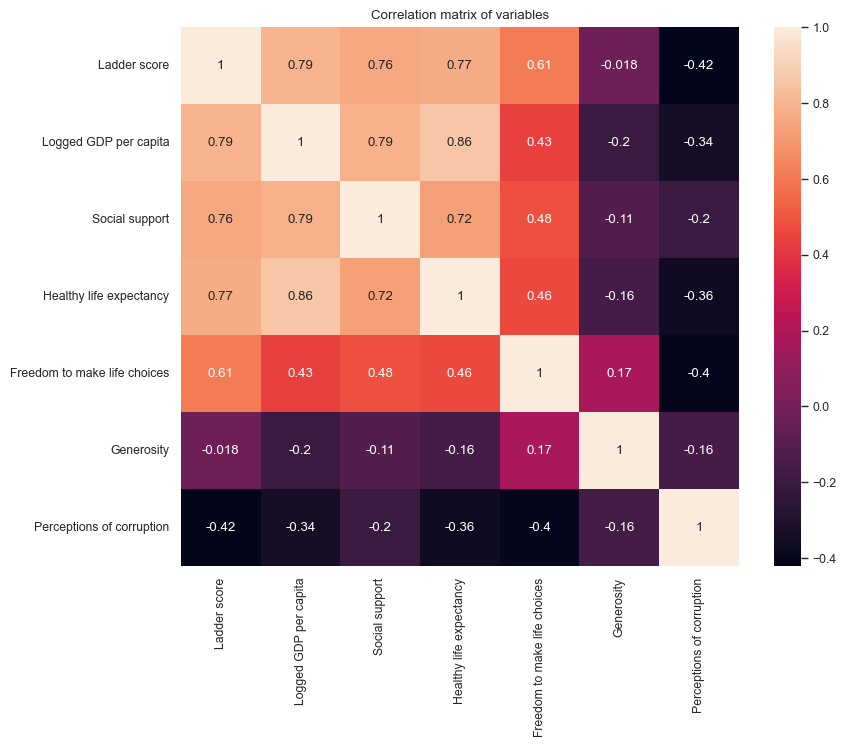

In [11]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation matrix of variables')
plt.show()

All numerical features

In [12]:
numeric_df = df.select_dtypes(include=['float64'])
summary_stats = numeric_df.describe()
print(summary_stats)

       Ladder score  Logged GDP per capita  Social support  \
count    149.000000             149.000000      149.000000   
mean       5.532839               9.432208        0.814745   
std        1.073924               1.158601        0.114889   
min        2.523000               6.635000        0.463000   
25%        4.852000               8.541000        0.750000   
50%        5.534000               9.569000        0.832000   
75%        6.255000              10.421000        0.905000   
max        7.842000              11.647000        0.983000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               149.000000                    149.000000  149.000000   
mean                 64.992799                      0.791597   -0.015134   
std                   6.762043                      0.113332    0.150657   
min                  48.478000                      0.382000   -0.288000   
25%                  59.802000                      0.718000 

A look at all of the numerical features as plots

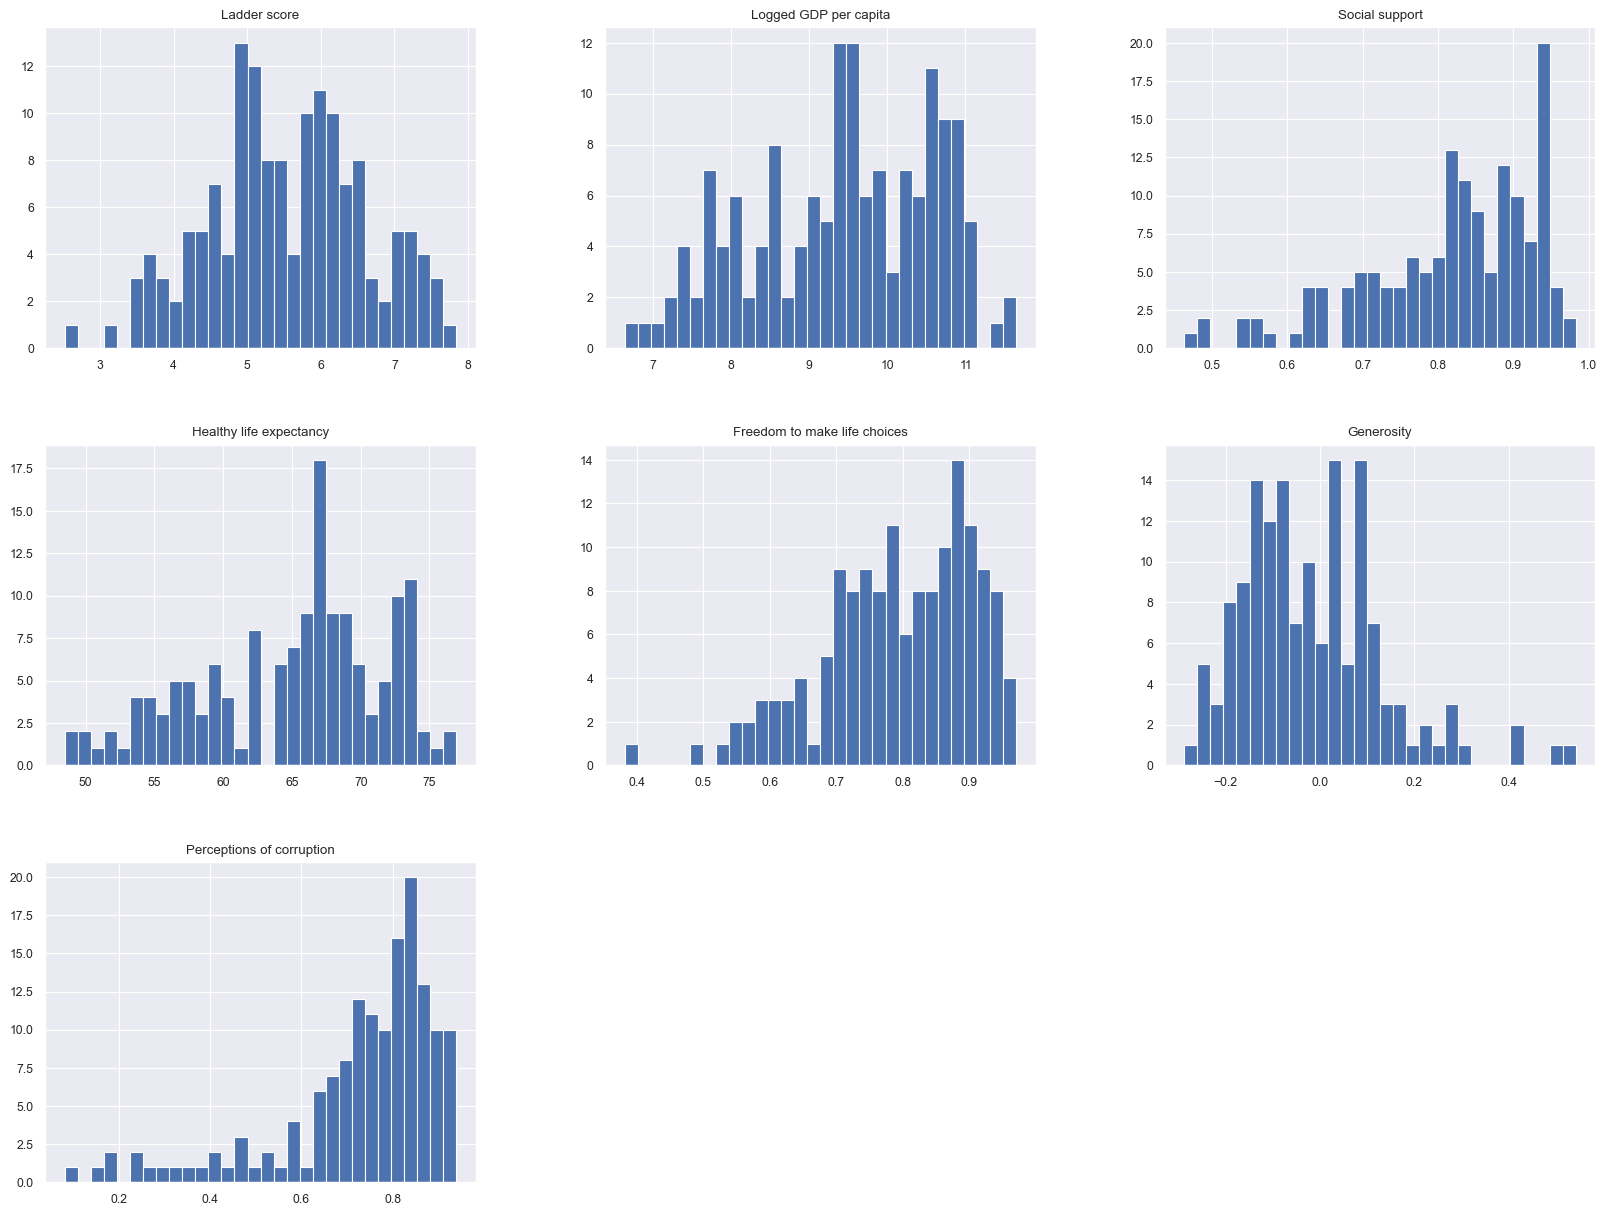

In [13]:
numeric_df = df.select_dtypes(include=['float64'])
numeric_df.hist(bins=30, figsize=(20,15))
plt.show()

A look at all of the numerical features as box plots

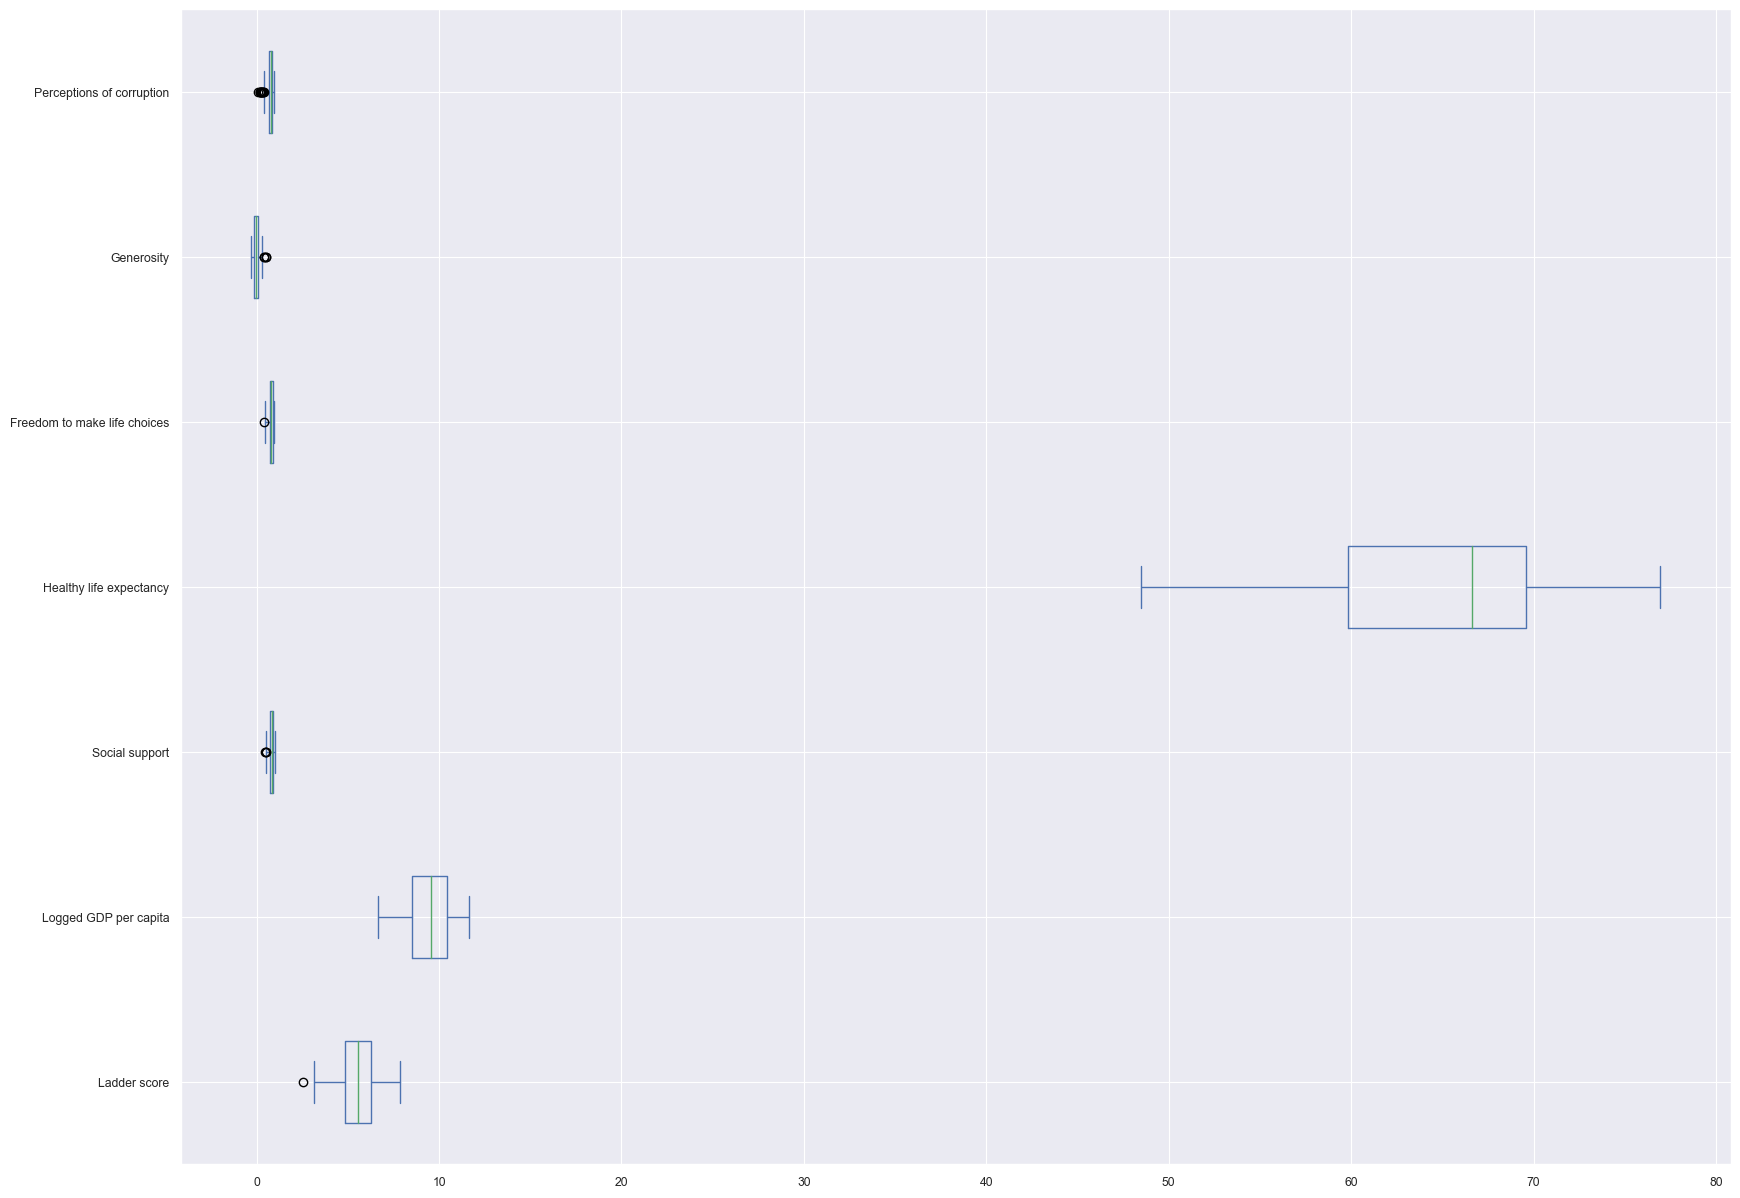

In [14]:
numeric_df = df.select_dtypes(include=['float64'])
numeric_df.plot(kind='box', figsize=(20,15), vert=False)
plt.show()

Histograms of single numeric variables

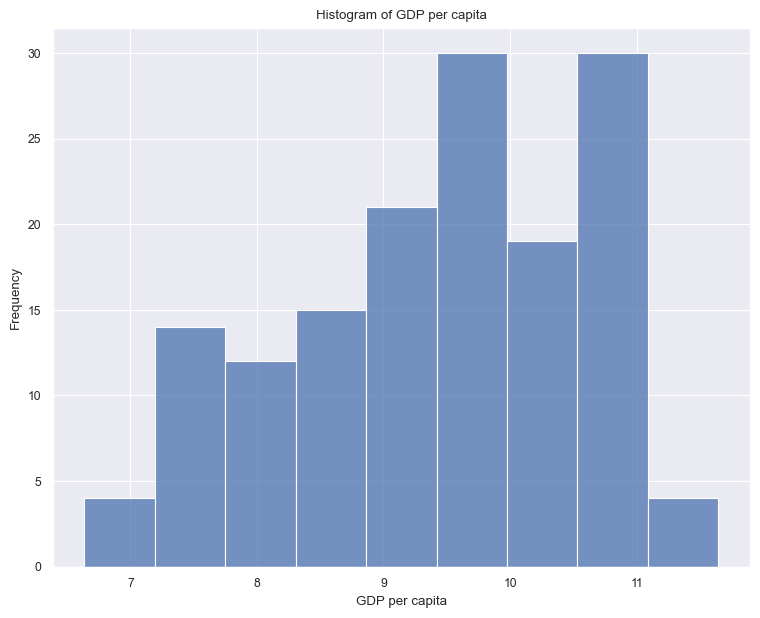

In [15]:
sns.histplot(df['Logged GDP per capita'], kde=False)
plt.title('Histogram of GDP per capita')
plt.xlabel('GDP per capita')
plt.ylabel('Frequency')
plt.show()

Grid of scatter plots (numeric variables)


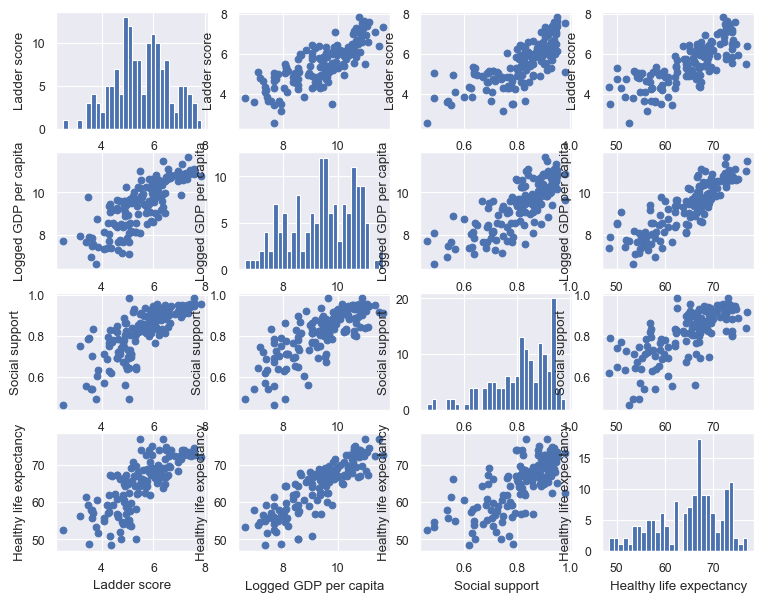

In [16]:
numeric_vars = ['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy']
var = len(numeric_vars)
for i in range(var):
    for j in range(var):
        plt.subplot(var, var, i * var + j + 1)
        if i == j:
            df[numeric_vars[i]].hist(bins=30)
        else:
            plt.scatter(df[numeric_vars[j]], df[numeric_vars[i]])
        plt.xlabel(numeric_vars[j])
        plt.ylabel(numeric_vars[i])
plt.show()

Ladder score showing overall happiness scores

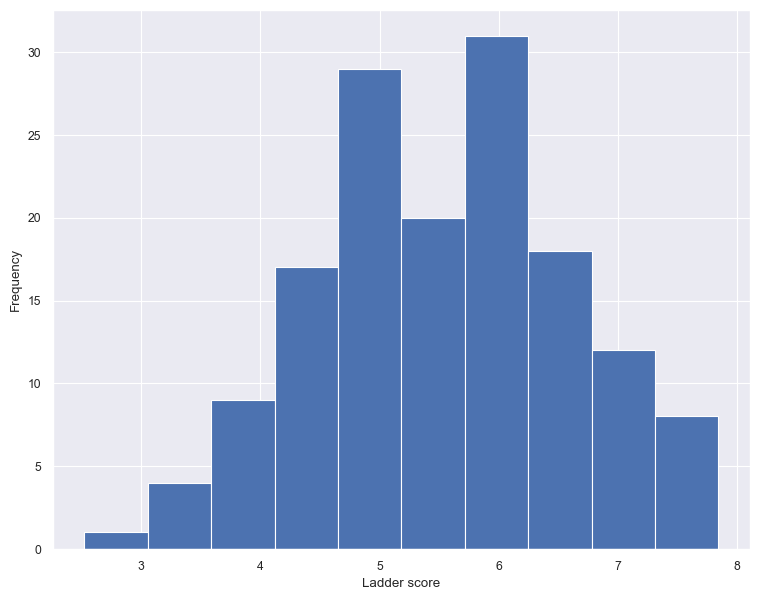

In [17]:
plt.hist(df["Ladder score"], bins=10)
plt.xlabel("Ladder score")
plt.ylabel("Frequency")
plt.show()

Relationship between overall happiness and all factors

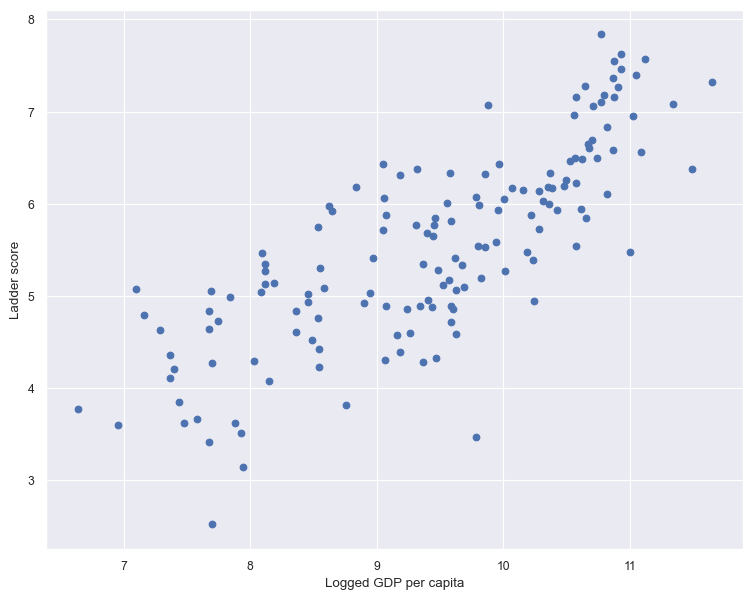

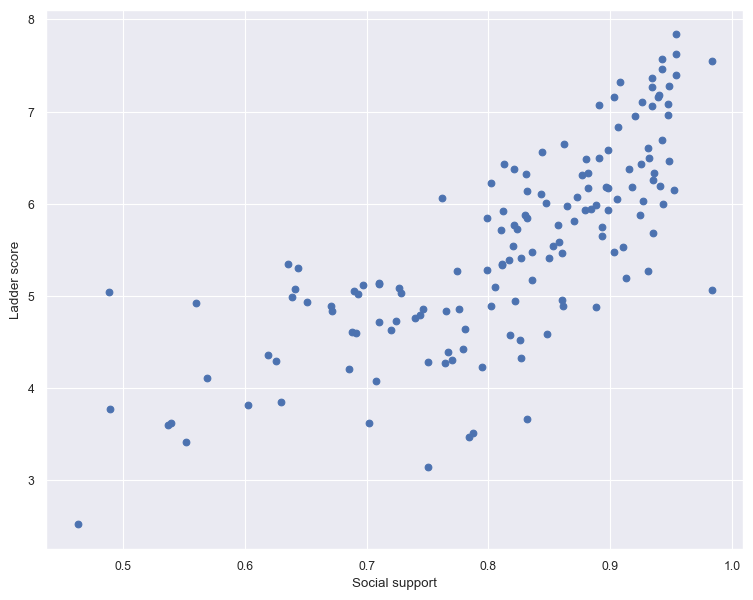

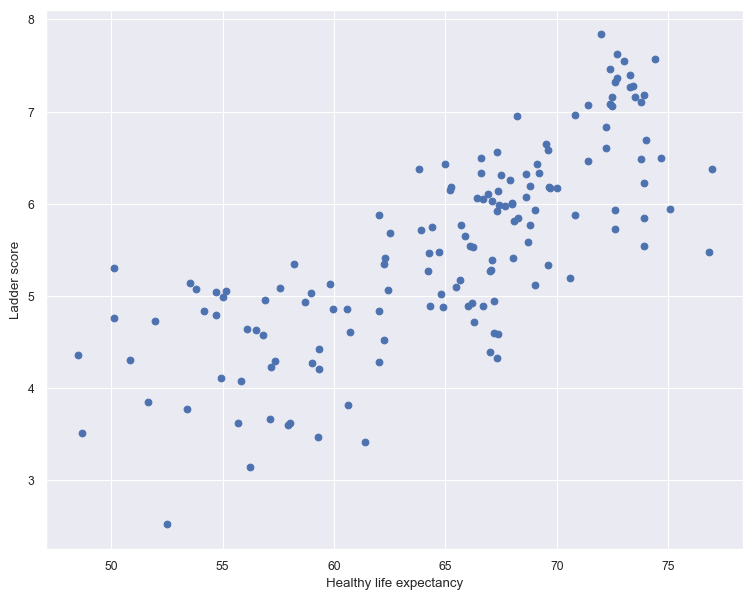

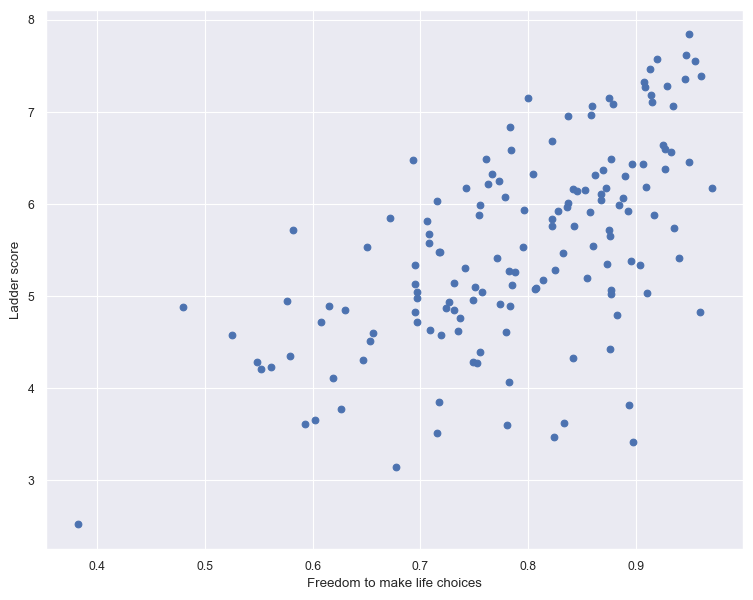

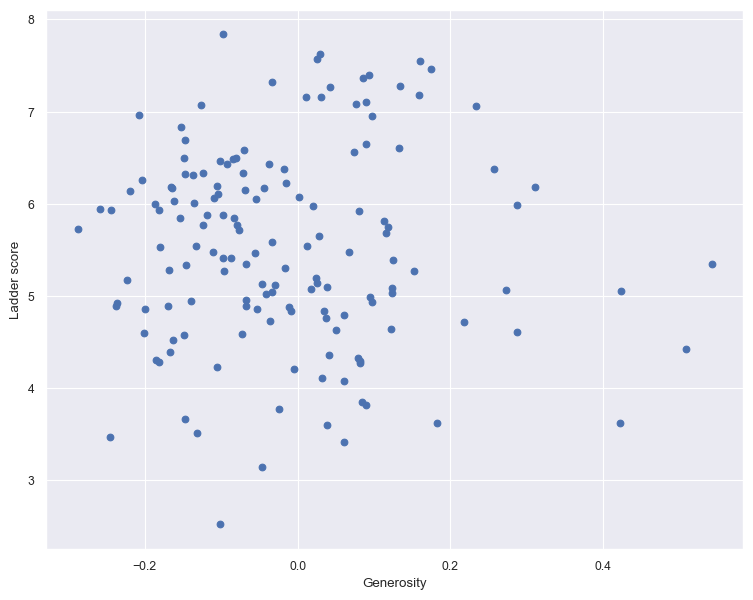

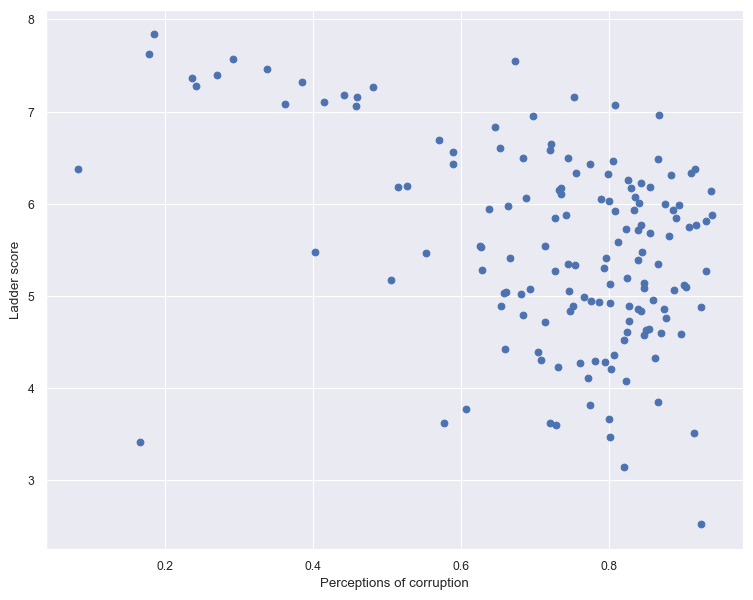

In [18]:
plt.scatter(df["Logged GDP per capita"], df["Ladder score"])
plt.xlabel("Logged GDP per capita")
plt.ylabel("Ladder score")
plt.show()

plt.scatter(df["Social support"], df["Ladder score"])

plt.xlabel("Social support")
plt.ylabel("Ladder score")
plt.show()

plt.scatter(df["Healthy life expectancy"], df["Ladder score"])
plt.xlabel("Healthy life expectancy")
plt.ylabel("Ladder score")
plt.show()

plt.scatter(df["Freedom to make life choices"], df["Ladder score"])
plt.xlabel("Freedom to make life choices")
plt.ylabel("Ladder score")
plt.show()

plt.scatter(df["Generosity"], df["Ladder score"])
plt.xlabel("Generosity")
plt.ylabel("Ladder score")
plt.show()
plt.scatter(df["Perceptions of corruption"], df["Ladder score"])

plt.xlabel("Perceptions of corruption")
plt.ylabel("Ladder score")
plt.show()

Healthy life expectancy: scatterplot of Ladder score vs Social support

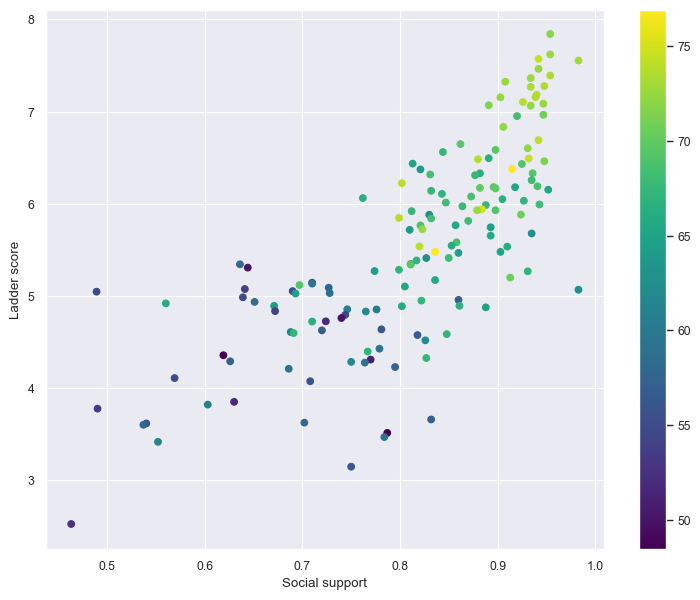

In [19]:
plt.scatter(df['Social support'], df['Ladder score'], c=df['Healthy life expectancy'], cmap='viridis')
plt.xlabel('Social support')
plt.ylabel('Ladder score')
plt.colorbar()
plt.show()

## Machine Learning

**Universal Variables**

In [20]:
predictors = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
target =['Ladder score']

**KNN**

Setting up test/train dataset split for KNN:
(Doing some preliminary testing)

In [21]:
#predictors
X = np.array(df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']])
#target
y = np.array(df['Ladder score'])

scaler = StandardScaler()
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=10)
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

knnRe = KNeighborsRegressor()
knnRe.fit(xTrain, yTrain)

predictions = knnRe.predict(xTest)
mseBlind = np.sqrt(((yTrain.mean() - yTest)**2).mean())
default_rmse = np.sqrt(((predictions - yTest)**2).mean())

print('Test RMSE: Baseline: {0:1f}'.format(mseBlind))
print('Test RMSE: Default: {0:1f}'.format(default_rmse))

Test RMSE: Baseline: 0.997412
Test RMSE: Default: 0.610811


## Linear Regression

In [22]:
#Prediction of Happines
x = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']]
y = df['Ladder score']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Predicted happiness scores:', y_pred[:10]) 

Predicted happiness scores: [6.22825636 6.45914169 4.9651746  5.97890704 6.31145023 7.12702581
 5.75590407 4.34022355 5.58929053 4.28381106]


In [23]:
#social support on happiness
x = df[['Social support']]
y = df['Ladder score']
model = LinearRegression()
model.fit(x, y)

print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)
print(predictions)

Intercept: -0.23147895668664997
Coefficient: [7.07499662]
[4.9068 4.8394 7.1968 5.9256 5.9954 6.2504 5.5434 6.0634 6.8076 4.8912
 5.0596 4.8134 5.208  7.2502 6.4258 4.6336 4.963  6.0712 6.3378 6.021
 6.1982 4.7824 5.1572 7.0158 5.2906 7.2534 4.7062 4.5614 4.308  5.4734
 4.4126 4.8838 5.5546 4.5466 5.9864 5.6764 5.744  6.4    4.778  4.6564
 6.6172 6.4846 5.6376 4.545  4.894 ]


In [24]:
#Coefficients

x = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']]
y = df['Ladder score']

#Split the dataset into training and test sets and make linear regression
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
coefficients = model.coef_

print('Coefficient: ', coefficients)

Coefficient:  [0.26843647 2.35988738 0.03925584 2.34726884]


In [25]:
#Data that contributes most to happiness
x = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']] # independent variables
y = df['Ladder score']
model = LinearRegression()
model.fit(x, y)
coefficients = pd.DataFrame({'Name': x.columns, 'Coefficient': model.coef_})

print(coefficients)
print(predictions) 

                           Name  Coefficient
0         Logged GDP per capita     0.279533
1                Social support     2.476206
2       Healthy life expectancy     0.030314
3  Freedom to make life choices     2.010465
4                    Generosity     0.364382
5     Perceptions of corruption    -0.605092
[4.9068 4.8394 7.1968 5.9256 5.9954 6.2504 5.5434 6.0634 6.8076 4.8912
 5.0596 4.8134 5.208  7.2502 6.4258 4.6336 4.963  6.0712 6.3378 6.021
 6.1982 4.7824 5.1572 7.0158 5.2906 7.2534 4.7062 4.5614 4.308  5.4734
 4.4126 4.8838 5.5546 4.5466 5.9864 5.6764 5.744  6.4    4.778  4.6564
 6.6172 6.4846 5.6376 4.545  4.894 ]


**Accuracy**

In [26]:
#Linear regression accuracy for predicting happiness

x = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']] # independent variables
y = df['Ladder score']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
r_squared = model.score(X_test, y_test)

print('r-squared:', r_squared)

r-squared: 0.600561706465375


Confusion Matrix

In [27]:
#Accuracy of a linear regression for scores(root,ebsolute,etc)

x = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df['Ladder score']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print('Errors:')
print('absolute:', mae)
print('squared:', mse)
print('Root:', rmse)
print('r-squared:', r_squared)

Errors:
absolute: 0.538862102089088
squared: 0.4121478648156687
Root: 0.6419874335340753
r-squared: 0.600561706465375


Precision/Recall
ROC curve, Precision/Recall Curve

MSE Error

In [28]:
mse = mean_squared_error(y_test, y_pred)

print("MSE: {:.2f}".format(mse))


MSE: 0.41


RMSE Error

In [29]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("RMSE: {:.2f}".format(rmse))

RMSE: 0.64


R-squared Statistic

In [30]:
r2 = r2_score(y_test, y_pred)

print("r-squared value: {:.2f}".format(r2))

r-squared value: 0.60


Predicted Actual Scatterplot

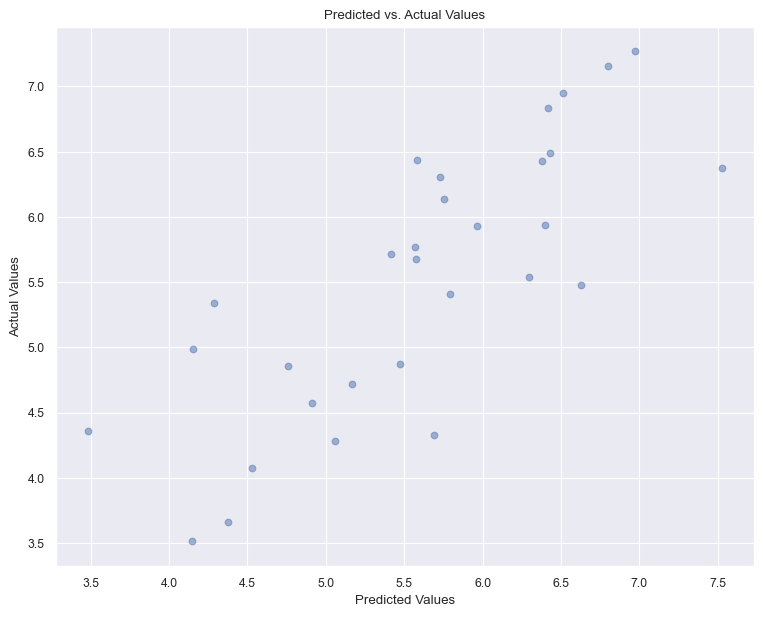

In [31]:
plt.scatter(y_pred, y_test, alpha=0.5)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.show()


Grid Search to Tune Hyperparameters

Feature Selection

In [32]:
x = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
          'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df['Ladder score']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
selector = SelectFromModel(lin_reg)
selector.fit(X_train, y_train)

print('Selected features:', x.columns[selector.get_support()])

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
lin_reg_selected = LinearRegression()
lin_reg_selected.fit(X_train_selected, y_train)
y_pred = lin_reg_selected.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
print('squared error:', mse)

Selected features: Index(['Social support', 'Freedom to make life choices'], dtype='object')
squared error: 0.5159435203118938


Learning Curve

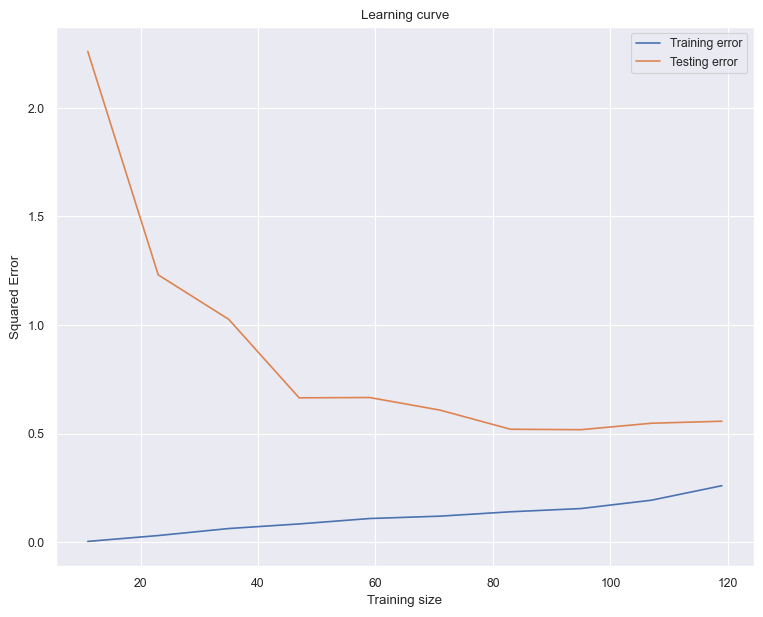

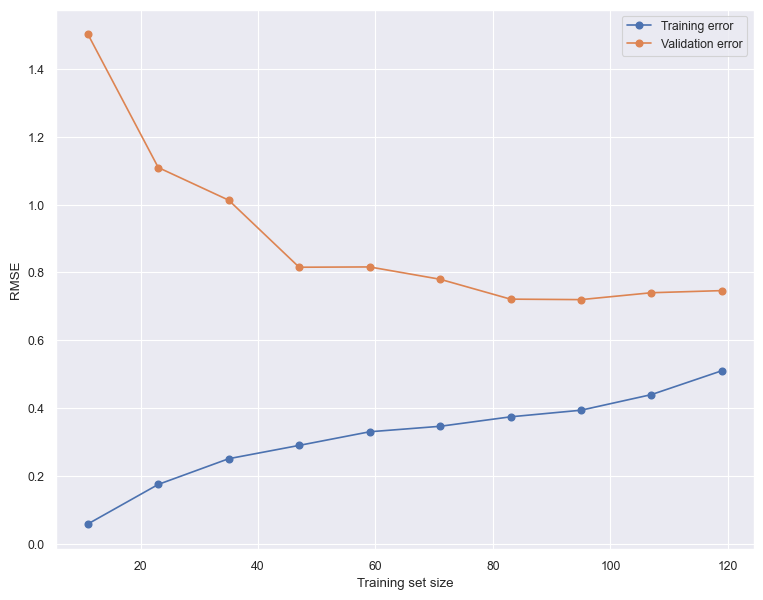

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
x = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
          'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df['Ladder score']
lin_reg = LinearRegression()
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(lin_reg, x, y, train_sizes=train_sizes, cv=5, scoring='neg_mean_squared_error')
train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, test_mean, label='Testing error')
plt.xlabel('Training size')
plt.ylabel('Squared Error')
plt.title('Learning curve')
plt.legend()
plt.show()

train_rmse = np.sqrt(-np.mean(train_scores, axis=1))
test_rmse = np.sqrt(-np.mean(test_scores, axis=1))

plt.plot(train_sizes, train_rmse, 'o-', label='Training error')
plt.plot(train_sizes, test_rmse, 'o-', label='Validation error')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

Train,Test & Predictions

In [34]:
x = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df['Ladder score']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Predictions:", y_pred[:10])
print('')
print("Actual values:", y_test[:10])

Predictions: [6.29562789 6.51270075 5.16896857 5.78904709 6.62533387 7.52699374
 5.56720855 4.37840266 5.41866627 4.28446025]

Actual values: 73     5.536
18     6.951
117    4.721
78     5.411
76     5.477
31     6.377
64     5.766
140    3.658
68     5.716
82     5.342
Name: Ladder score, dtype: float64


Assess Result (regression case) and Tuning

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)

MAE: 0.538862102089088
MSE: 0.4121478648156687
RMSE: 0.6419874335340753
R2: 0.600561706465375


Cross-validation can be used in both assessment and tuning

In [36]:
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print('Mean RMSE:', mean_rmse)
print('Standard RMSE:', std_rmse)

Mean RMSE: 0.7111087957537237
Standard RMSE: 0.22625849002104095


Assess Bias/Variance

## Decision Tree

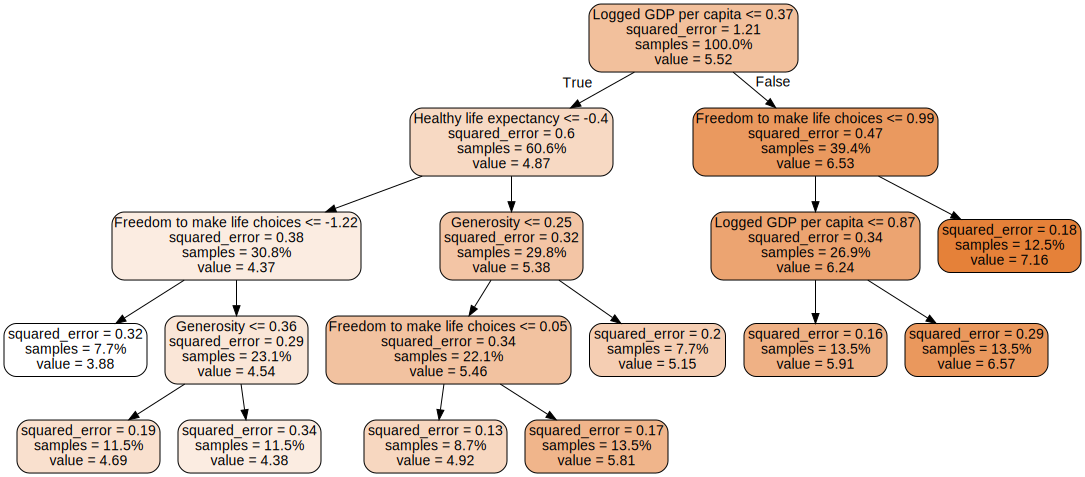

In [40]:
DTreg = DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=8, max_features='sqrt')
DTreg.fit(xTrain, yTrain)
dot_data = export_graphviz(DTreg, precision=2,
                     feature_names=predictors,  
                     proportion=True,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)  
graph

In [41]:
# make predictions and compute the accuracy
y_predict = DTreg.predict(xTest)

#accuracy score
train_accuracy = DTreg.score(xTrain,yTrain)
test_accuracy = DTreg.score(xTest,yTest)

print('Decision Tree train accuracy: {:.2f}%'.format(train_accuracy * 100))
print('Decision Tree test accuracy: {:.2f}%'.format(test_accuracy * 100))

Decision Tree train accuracy: 82.03%
Decision Tree test accuracy: 55.81%


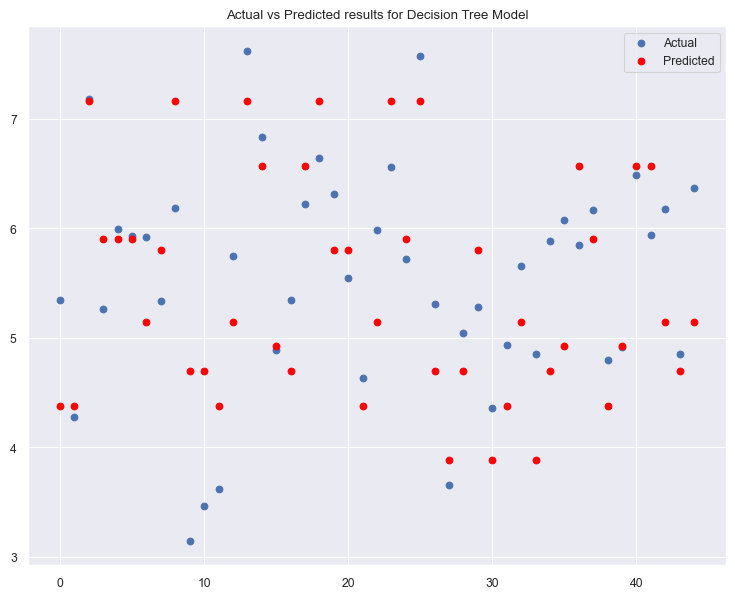

In [43]:
#comparing results via scatter plot
plt.scatter(range(len(yTest)),yTest)
plt.scatter(range(len(y_predict)),y_predict, color='red')
plt.title('Actual vs Predicted results for Decision Tree Model')
plt.legend(['Actual', 'Predicted']);

**Note on the Decision Tree Model**

The Decision Tree model has turned out to be fairly accurate. The accuracy can range between 18 to 63 percent. The variance of the accuracy of the model is fairly large depending on what columns are used from the selected predictors. However, it should be easy to get rid of some of the noise variables out of the model if tinkered with more.